ESE315 Assignment 1

11712638 梁时婧

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Question 1: The International Standard Atmosphere

In [2]:
# Open Excel file as Dataframe with Pandas
q1_file = pd.ExcelFile('ATM.xlsx')

# Setting Elevation as index column
df1 = q1_file.parse('Sheet1', index_col=0) 
df1.head()

,Temperature(K),Pressure(bar),Relative_Density,Kinematic_Viscosity,Thermal_Conductivity,Speed_of_Sound(m/s)
Elevation(m),,,,,,
-2000,301.20,1.27780,1.2067,1.253,2.636,347.9
-1500,297.90,1.20700,1.1522,1.301,2.611,346.0
-1000,294.70,1.13930,1.0996,1.352,2.585,344.1
-500,291.40,1.07480,1.0489,1.405,2.560,342.2
0,288.15,1.01325,1.0000,1.461,2.534,340.3


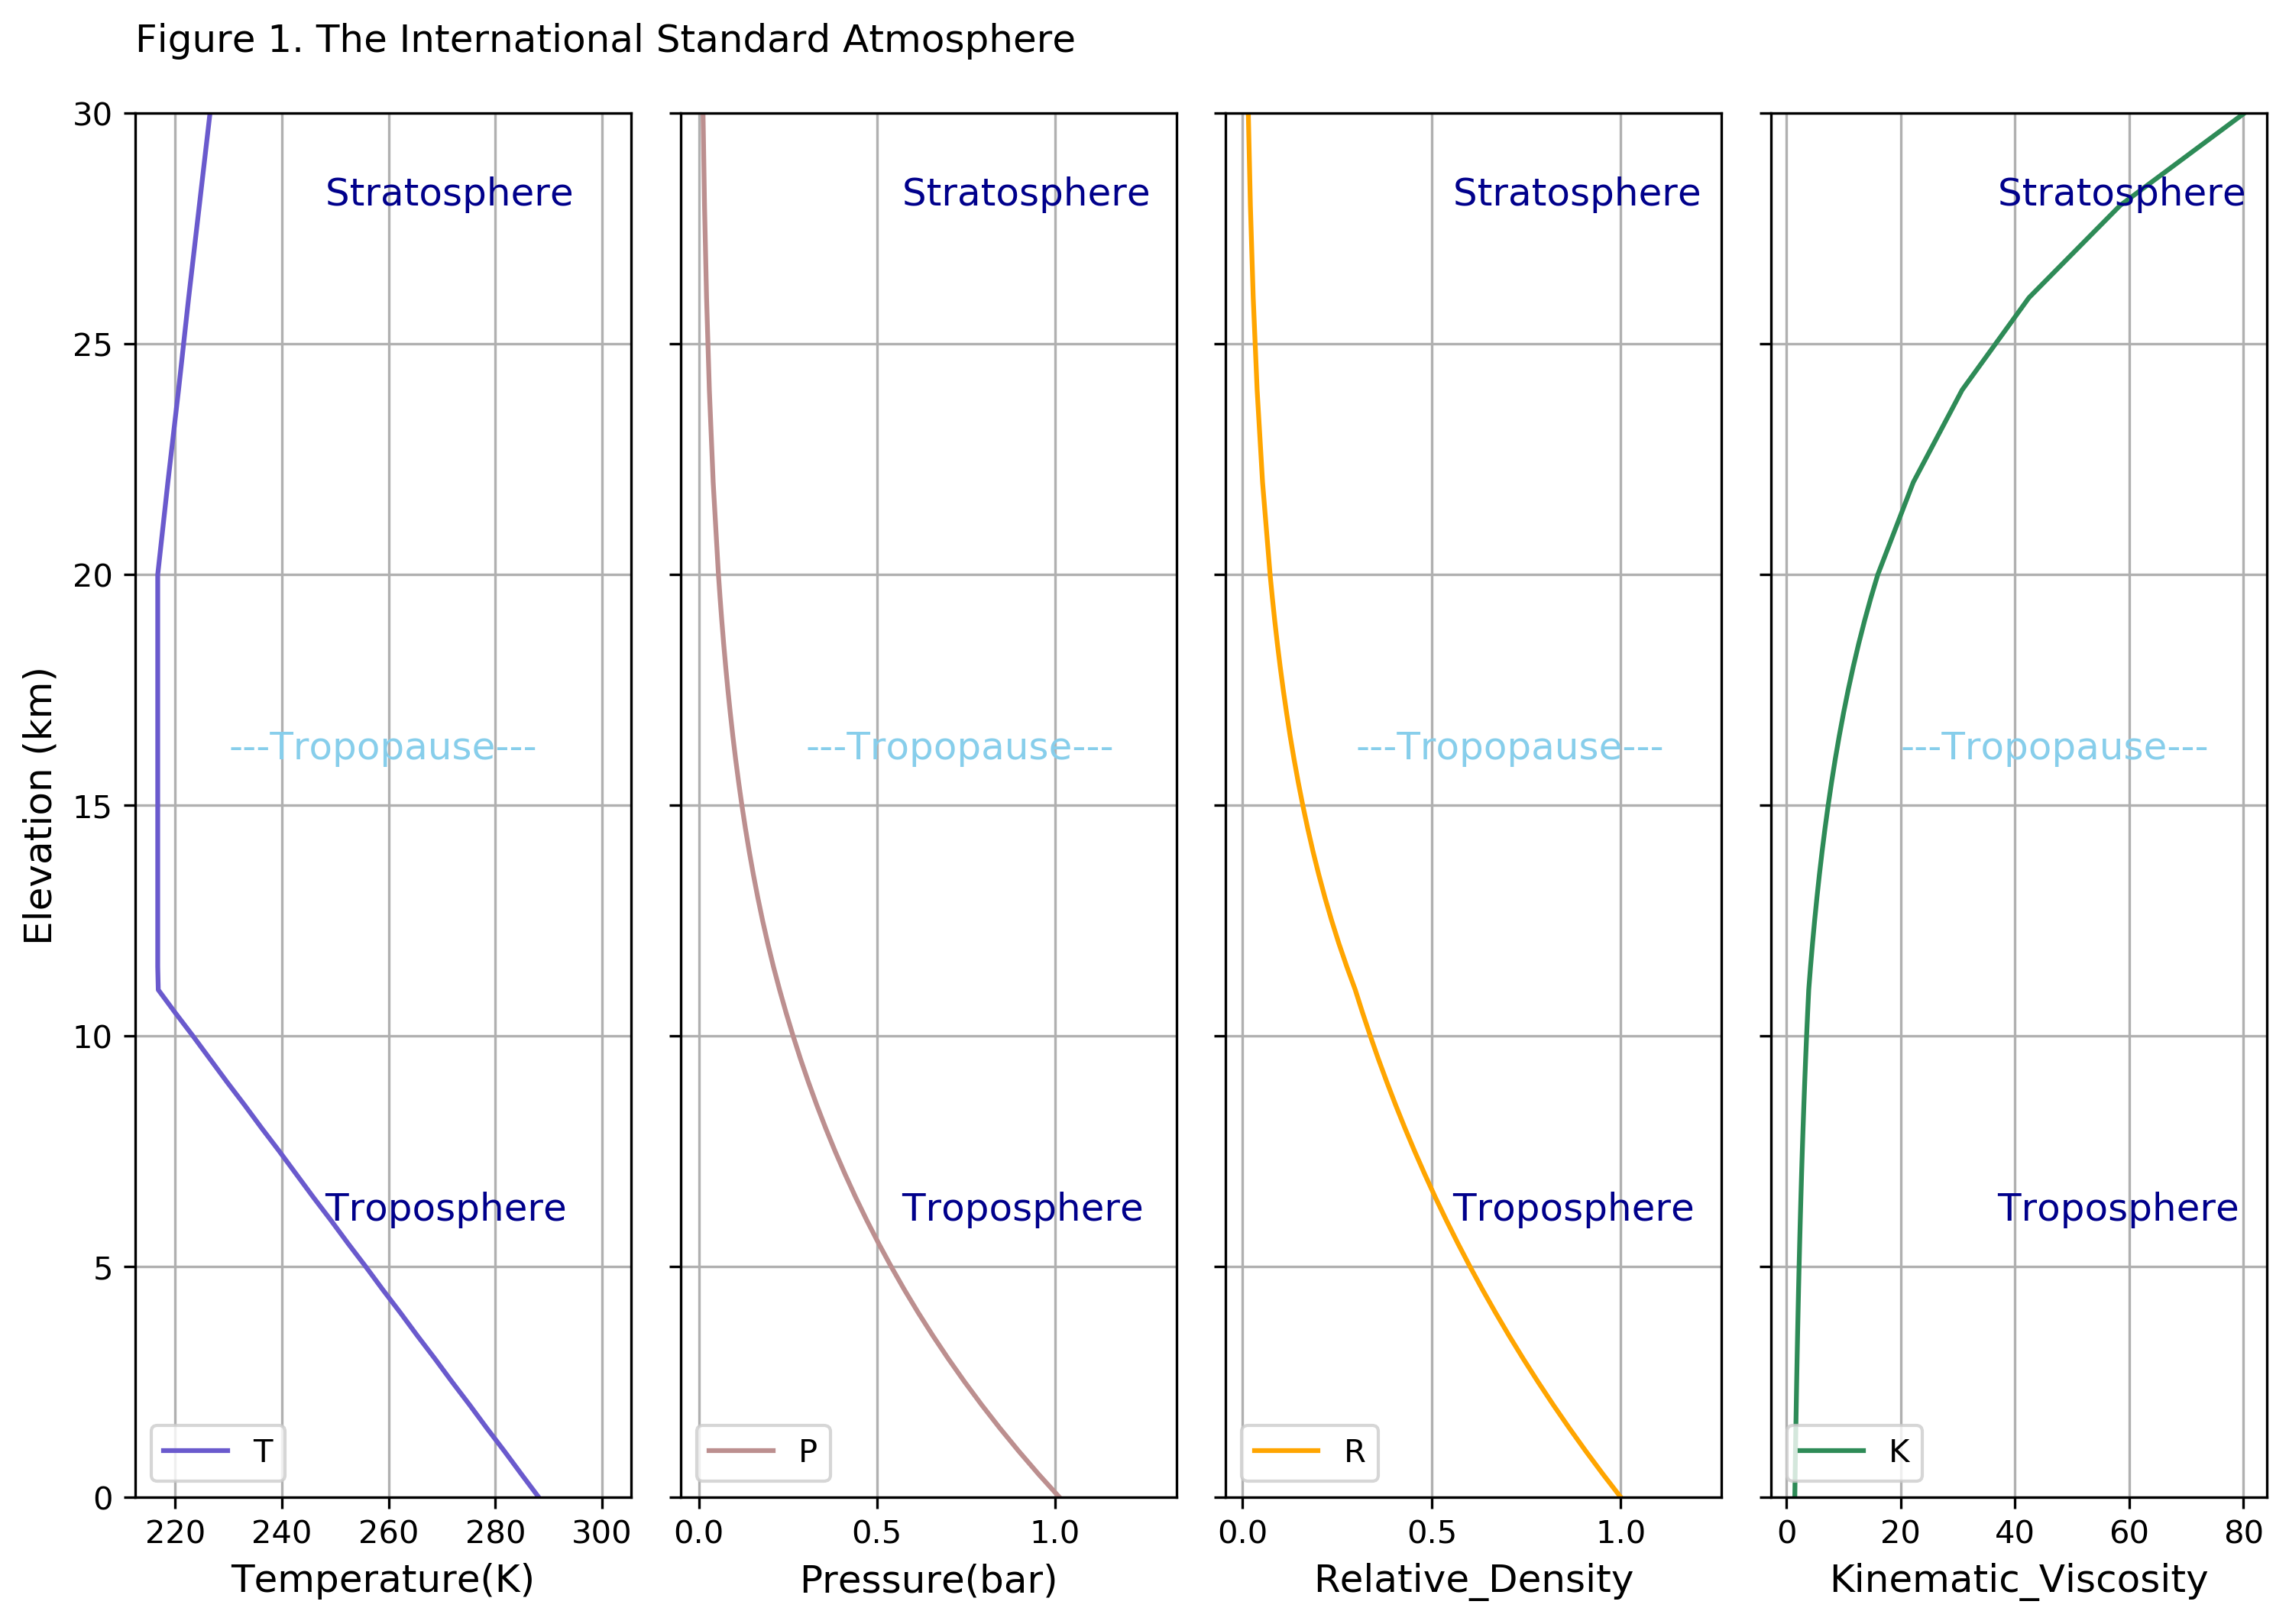

In [3]:
fig, ax = plt.subplots(1,4, sharey=True, figsize=(12,8), dpi=300)
plt.subplots_adjust(wspace=0.1, hspace=None)

var = df1.columns
col = ['slateblue','rosybrown','orange','seagreen']
central_x = [230,0.3,0.3,20]
for i in range(4):
    ax[i].plot(df1[var[i]], df1.index/1000, color=col[i])
    ax[i].text(central_x[i],16,'---Tropopause---'    , color='skyblue' ,fontsize=12)
    ax[i].text(central_x[i],28,'        Stratosphere', color='darkblue',fontsize=12)
    ax[i].text(central_x[i], 6, '        Troposphere', color='darkblue',fontsize=12)
    ax[i].grid()
    ax[i].set_xlabel(var[i], fontsize=12)
    ax[i].set_ylim(0,30)
    ax[i].legend(var[i], loc='lower left')
    
ax[0].set_ylabel('Elevation (km)', fontsize=12)
ax[0].set_title('Figure 1. The International Standard Atmosphere\n',loc='left')

plt.show()
#plt.savefig('assign1_q1.png',dpi=300)

$\textbf{Note.}$
$\textrm{The Relative Density is defined as the ratio of air density to that at standard pressure and temperature.}$
$\textrm{The unit of Kinematic Viscosity is} $$10^{-5} m^2/s$

# Question 2: 


## Why does the Earth's atmosphere have distinct layers with different vertical temperature gradients? 

There are four layers (troposphere, stratosphere, mesosphere, thermosphere in the Earth's atmosphere. Figure 1 only presents the troposphere and part of the stratosphere. The atmosphere is mainly heated by solar radiation absorbed at the surface, so the temperature is supposed to decrease with altitude, like the temperature decreases in troposphere.

When the altitude reaches 20 km above, the stratosphere air is dry and ozone rich. Due to the occurence of the ozone layer, the heating by the absorption of ultraviolet radiation causes the temperature to increase with height making Earth unique among the solar systems.

Without the ozone layer, the temperature in the mesosphere decreases with height. In the thermosphere, as a consequence of the absorption of incoming solar radiation, the temperature increases with height.


## Do you see this temperature profile on Venus and Mars?

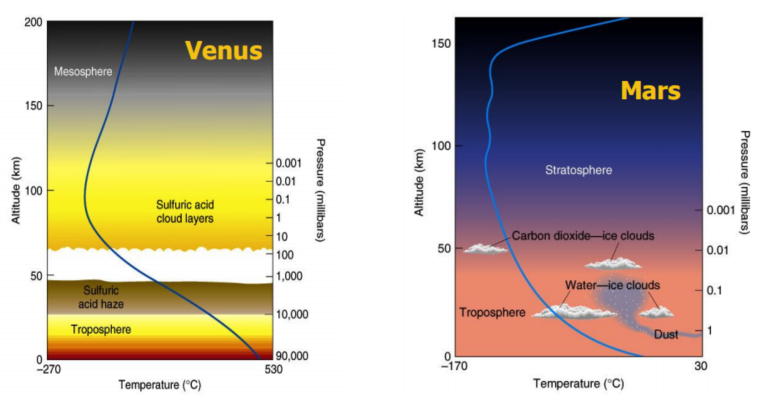

The characteristics of Earth's temperature profile does not occur in Venus. The temperature in Mars indicates a potential tendency of temperature inversion within the stratosphere, but it is not as apparent as that in Earth's atmosphere. 

# Question 3: 

## Briefly describe the three major stages of the evolution of the Earth's atmosphere. What are the major atmospheric components during each of those three stages?

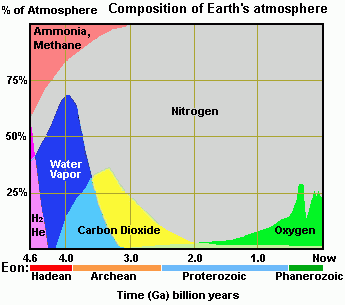

Three stages are:
1. The primary atmosphere: mostly $H_2$ and He and some $H_2O$, $CH_4$, $NH_3$ from the initial cloud that formed the Solar System. 

    Light gases gradually escaped or blown away by solar wind, while heavier gases remained and start to differentiate.
    

2. The secondary atmosphere:mostly $H_2O$ (79%),$CO_2$ (12%), $CH_4$, and some $NH_3$ and S compounds formed by Earth volcanism from 4.6 to 2 billion years ago. 

    There is no condition to retain $O_2$ because the high surface temperature and occurence of Fe. Four billion years ago, Earth gragually cooled and water vapor condensed to form surface water bodies.
    

3. Current stmosphere: mostly $N_2$, $O_2$, $H_2O$, $CO_2$, $O_3$, etc.

    The presence of free oxygen associated with the evolution of life on Earth. The atmosphere evolved from a reduced state to an oxidized state. Oxygen could originate via two mechanisms, the photolysis of $H_2O$ and $CO_2$, the photosynthesis by organisms.

# Question 4: 

## Shenzhen Meteorological Data System: Plot the time series of one meteorological variable at that site between 1981 to 2019.

In [4]:
# Open Excel file as Dataframe with Pandas
# Mid-Autumn Festival surface temperature (1981-2019)
q2_file = pd.ExcelFile('Shenzhen.xlsx')

# Setting Elevation as index column
df2 = q2_file.parse('Sheet1', index_col=0) 
df2.head()

,Tmin,Tmax,Tmean
Year,,,
1981,24.2,32.7,28.1
1982,23.4,30.9,26.6
1983,25.0,32.4,28.0
1984,24.6,32.8,28.6
1985,21.0,26.0,23.3


In [5]:
# Calculate the linear regression of the time series
from scipy.stats import stats
lin = stats.linregress(df2.index,df2.Tmean.values)
lin

LinregressResult(slope=0.04880566801619433, intercept=-70.09082321187583, rvalue=0.3509033451262247, pvalue=0.028504812526275406, stderr=0.021411579964230622)

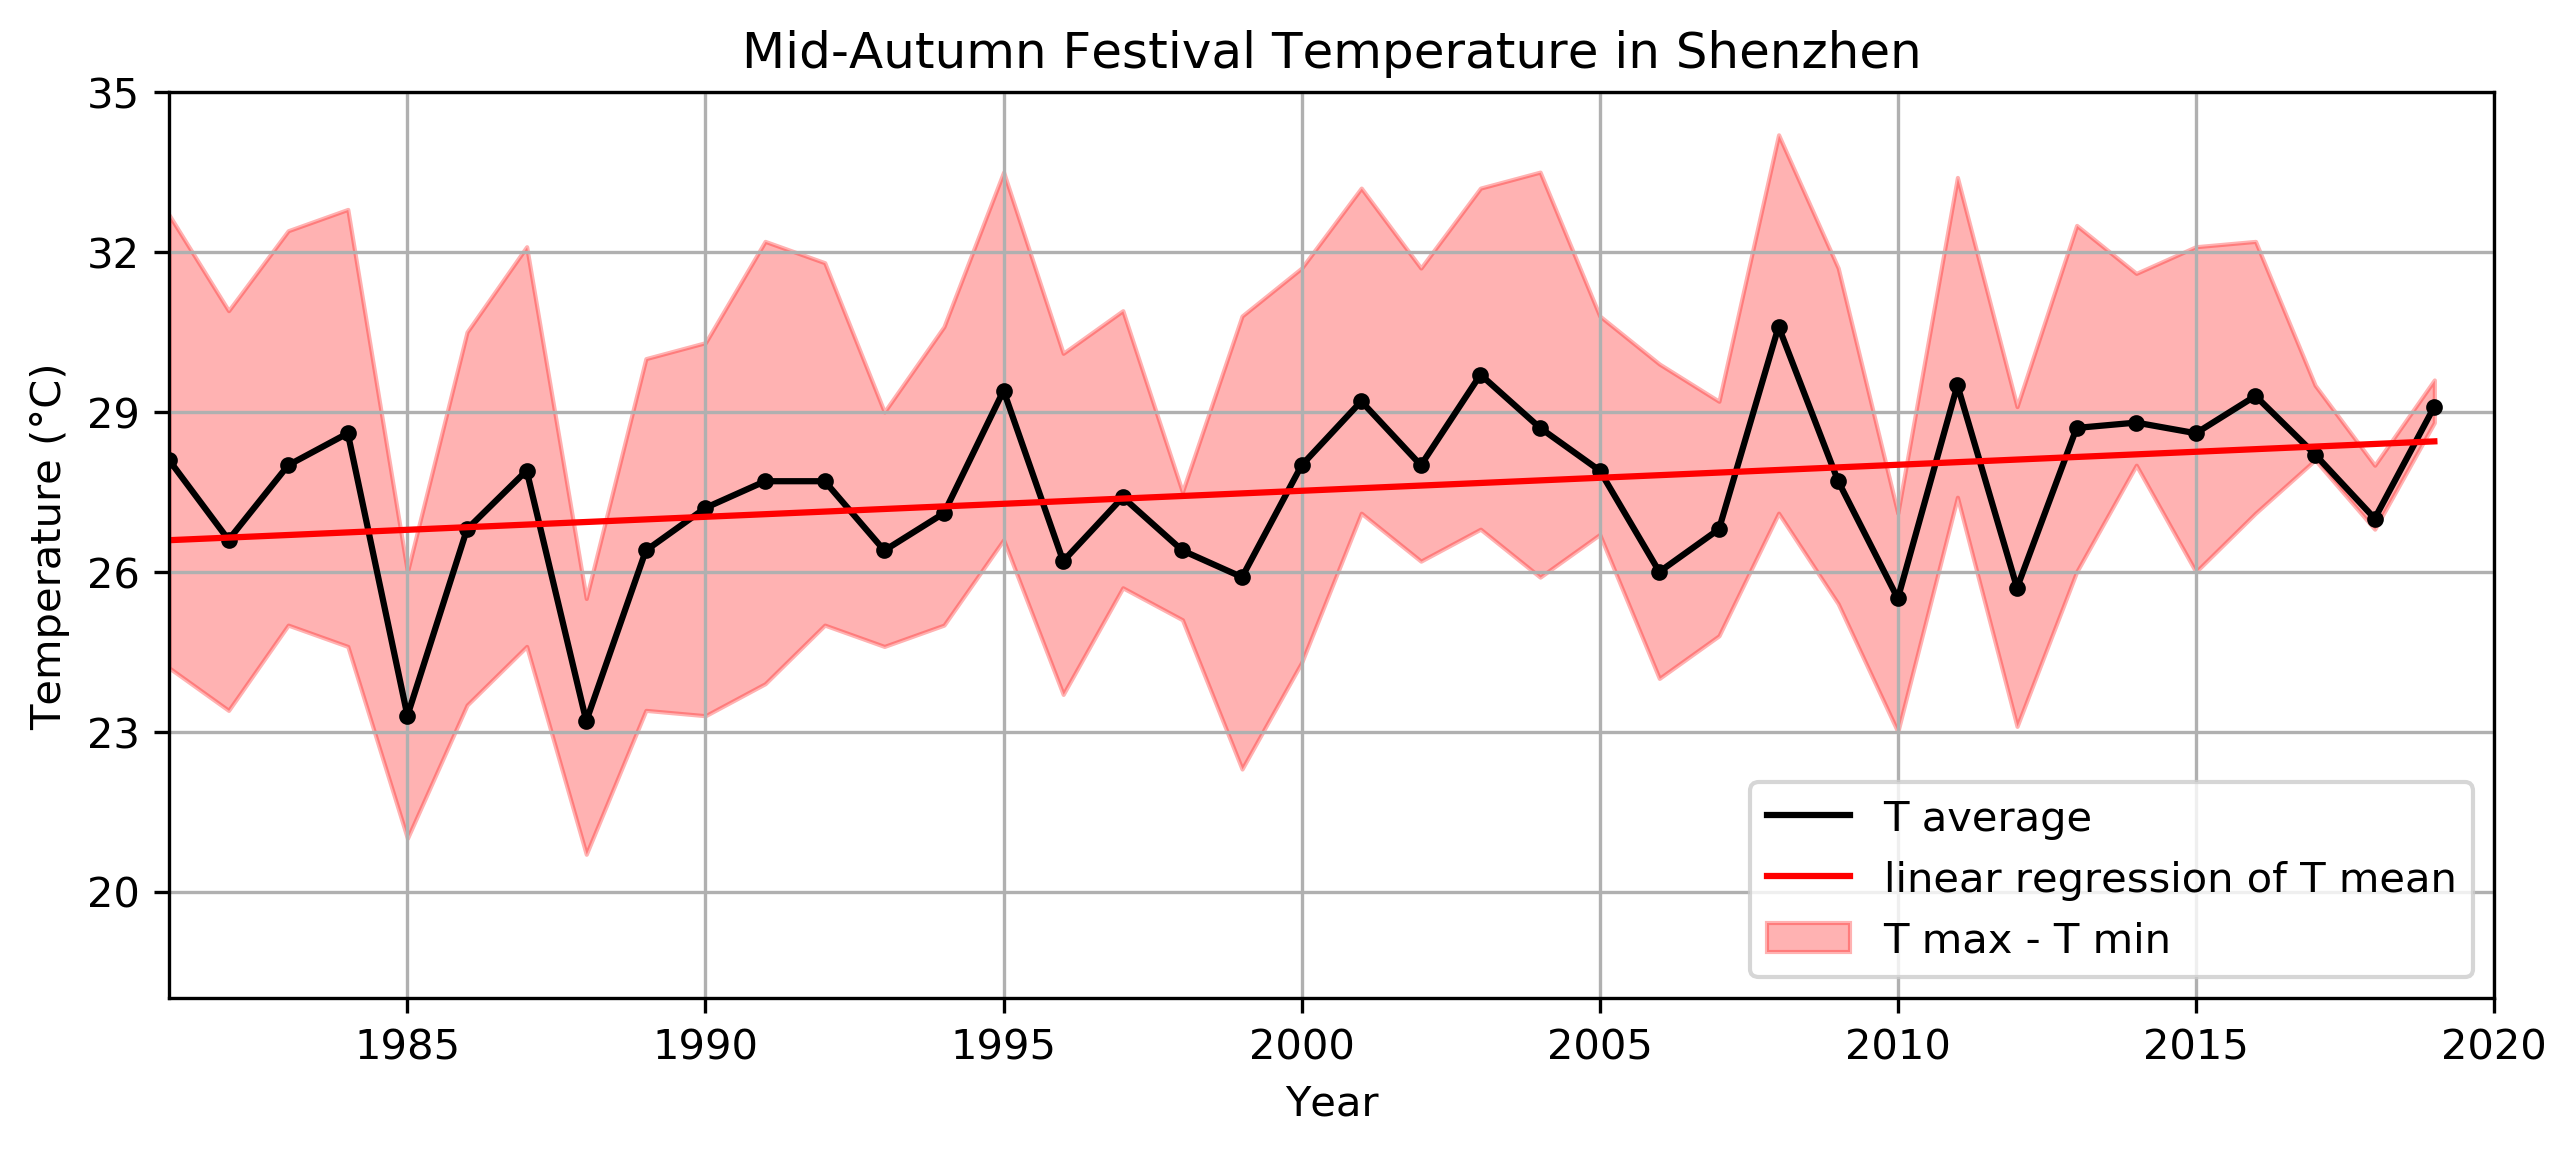

In [6]:
fig, ax = plt.subplots(figsize=(10,4), dpi=300)
ax.plot(df2.index, df2.Tmean, color='k',label='T average')
ax.plot(df2.index, df2.Tmean, '.', color='k')
ax.plot(df2.index, np.arange(1981,2020)*lin.slope+lin.intercept, color='r',label='linear regression of T mean')
ax.fill_between(df2.index, df2.Tmin, df2.Tmax, color='r',alpha=0.3, label='T max - T min')

ax.set_xlim(1981,2020)
ax.set_ylim(18,35)
ax.set_yticks([20,23,26,29,32,35])
ax.set_ylabel("Temperature (" + u'\N{DEGREE SIGN}C)')
ax.set_xlabel("Year")

ax.set_title("Mid-Autumn Festival Temperature in Shenzhen")
ax.grid()
ax.legend(loc='lower right')

$\textbf{Note.}$
$\textrm{T average: daily average temperature. }$
$\textrm{T min(max): daily minimun(maximum) temperature.}$